In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('/Users/Panda/Fun/FODS_Ass_2/Hitters.csv')

In [4]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [5]:
columns_with_missing = df.columns[df.isna().any()].tolist()
columns_with_missing

['Salary']

In [6]:
df['Salary'].fillna(df['Salary'].mean(), inplace=True)
assert df['Salary'].isna().sum()==0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AtBat      322 non-null    int64  
 1   Hits       322 non-null    int64  
 2   HmRun      322 non-null    int64  
 3   Runs       322 non-null    int64  
 4   RBI        322 non-null    int64  
 5   Walks      322 non-null    int64  
 6   Years      322 non-null    int64  
 7   CAtBat     322 non-null    int64  
 8   CHits      322 non-null    int64  
 9   CHmRun     322 non-null    int64  
 10  CRuns      322 non-null    int64  
 11  CRBI       322 non-null    int64  
 12  CWalks     322 non-null    int64  
 13  League     322 non-null    object 
 14  Division   322 non-null    object 
 15  PutOuts    322 non-null    int64  
 16  Assists    322 non-null    int64  
 17  Errors     322 non-null    int64  
 18  Salary     322 non-null    float64
 19  NewLeague  322 non-null    object 
dtypes: float64

In [8]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,407.557548
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,535.925882
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


array([[<Axes: title={'center': 'AtBat'}>,
        <Axes: title={'center': 'Hits'}>,
        <Axes: title={'center': 'HmRun'}>,
        <Axes: title={'center': 'Runs'}>,
        <Axes: title={'center': 'RBI'}>],
       [<Axes: title={'center': 'Walks'}>,
        <Axes: title={'center': 'Years'}>,
        <Axes: title={'center': 'CAtBat'}>,
        <Axes: title={'center': 'CHits'}>,
        <Axes: title={'center': 'CHmRun'}>],
       [<Axes: title={'center': 'CRuns'}>,
        <Axes: title={'center': 'CRBI'}>,
        <Axes: title={'center': 'CWalks'}>,
        <Axes: title={'center': 'PutOuts'}>,
        <Axes: title={'center': 'Assists'}>],
       [<Axes: title={'center': 'Errors'}>,
        <Axes: title={'center': 'Salary'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

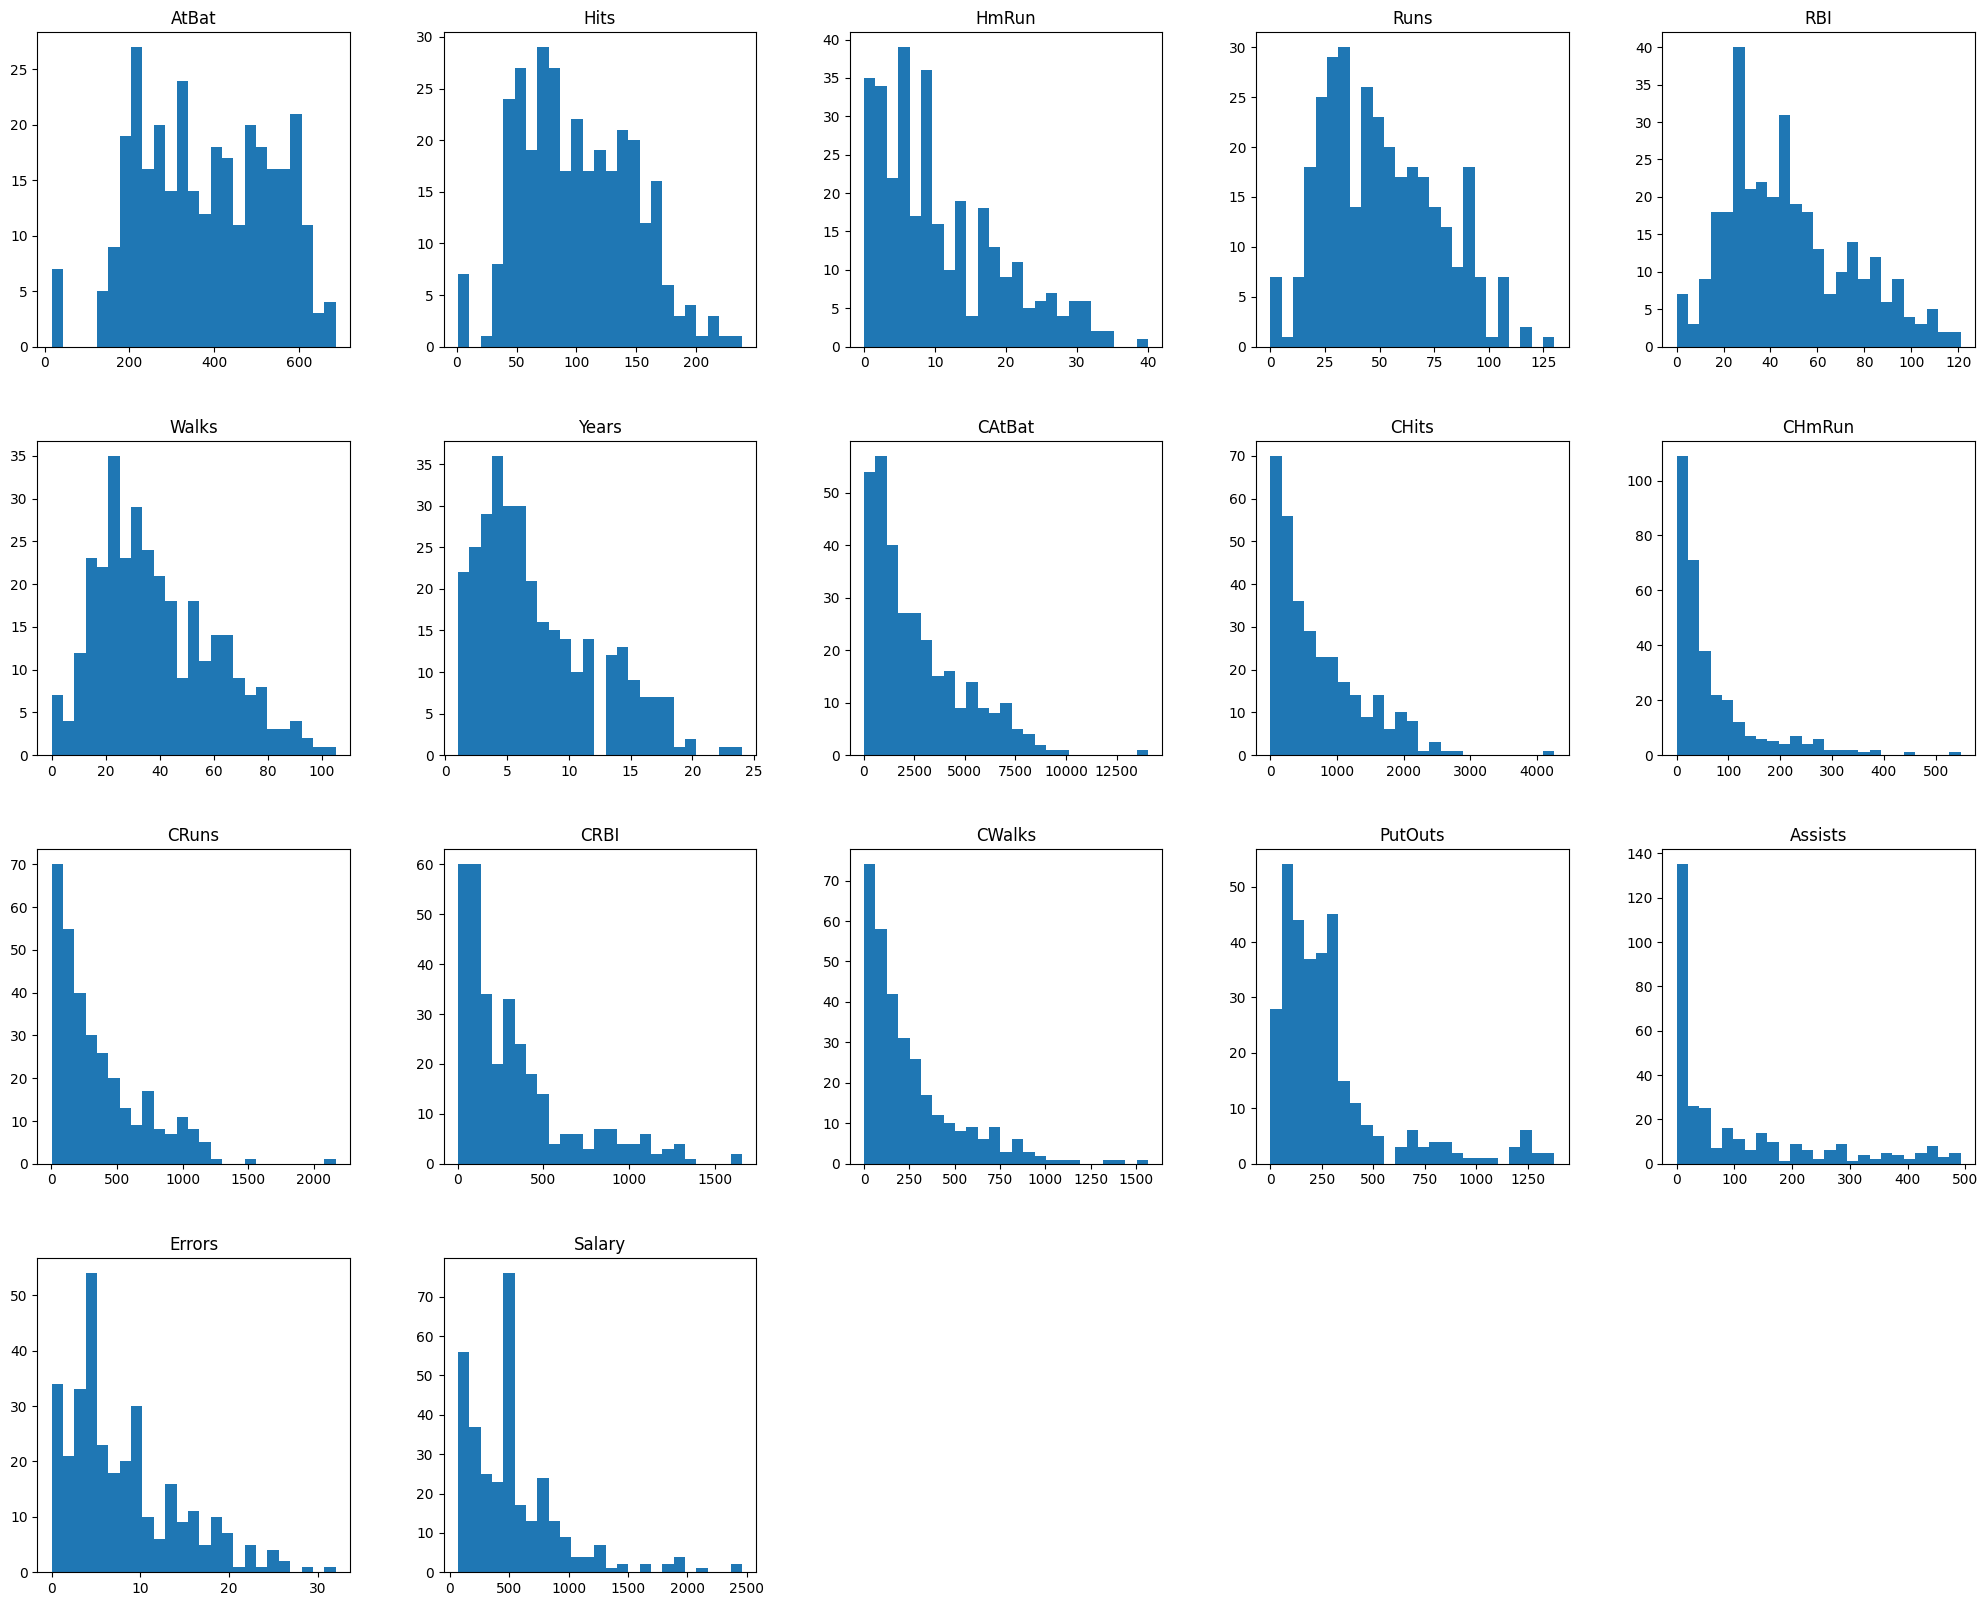

In [9]:
df.hist(figsize=(25,20), grid = False, layout=(4,5), bins = 25)

We observe the greatest deviation from a normal (Gaussian) distribution in the ASSISTS plot, indicating a high degree of skewness. This skewness might be attributed to the existence of outliers.

Moreover, there appears to be a resemblance in the distributions of CAtBat, CHits, CHmRUN, CRuns, CRBI, and CWalks. These variables seem to exhibit similar patterns or high correlation, which we will confirm through PCA analysis.

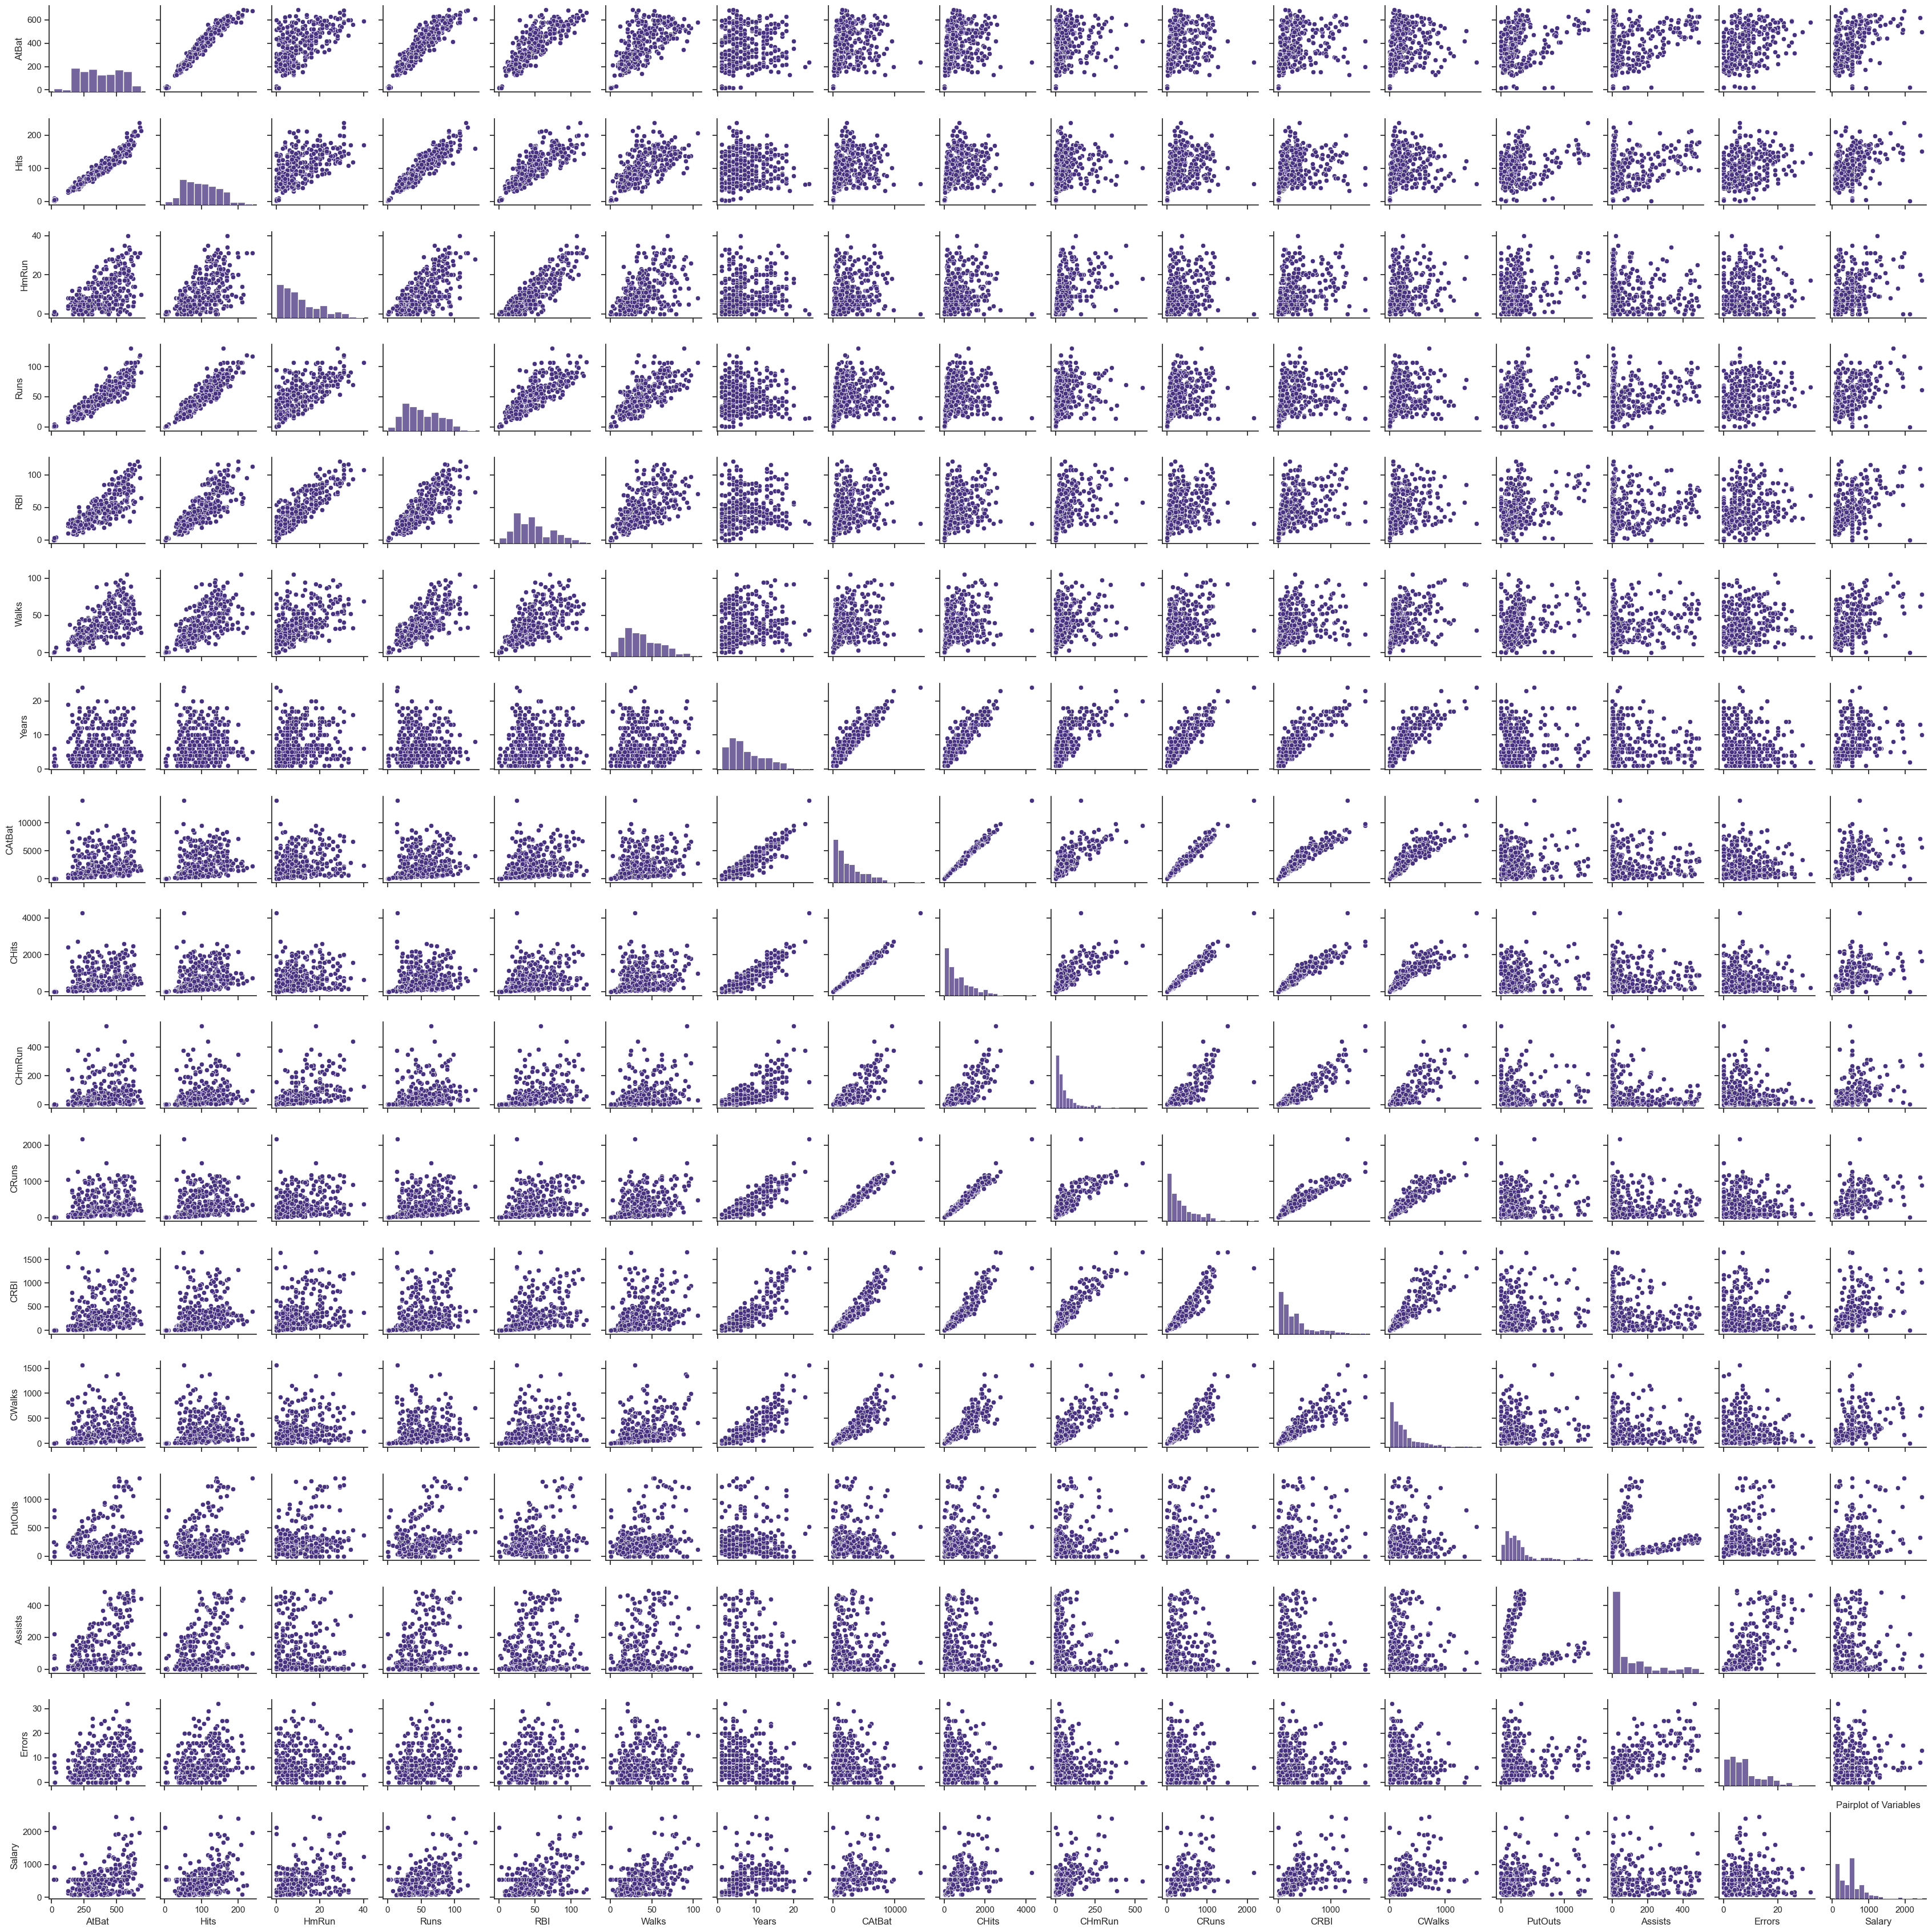

In [10]:
sns.set(style="ticks", palette="viridis")
sns.pairplot(df, height=2)
plt.title('Pairplot of Variables')
plt.tight_layout()

plt.show()

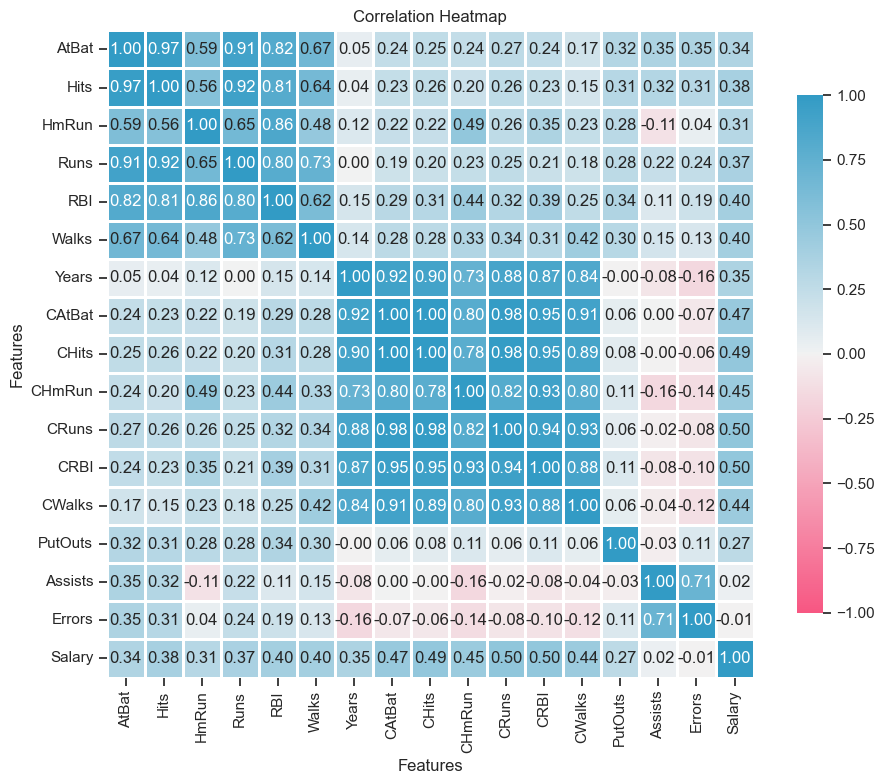

In [11]:
plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, cbar_kws={'shrink': 0.8}, square=True,
            annot=True, fmt='.2f', linewidths=0.8)

plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

plt.tight_layout()
plt.show()


In [12]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical columns: ", categorical_columns)
print("Numerical columns: ", numerical_columns)

Categorical columns:  Index(['League', 'Division', 'NewLeague'], dtype='object')
Numerical columns:  Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'Salary'],
      dtype='object')


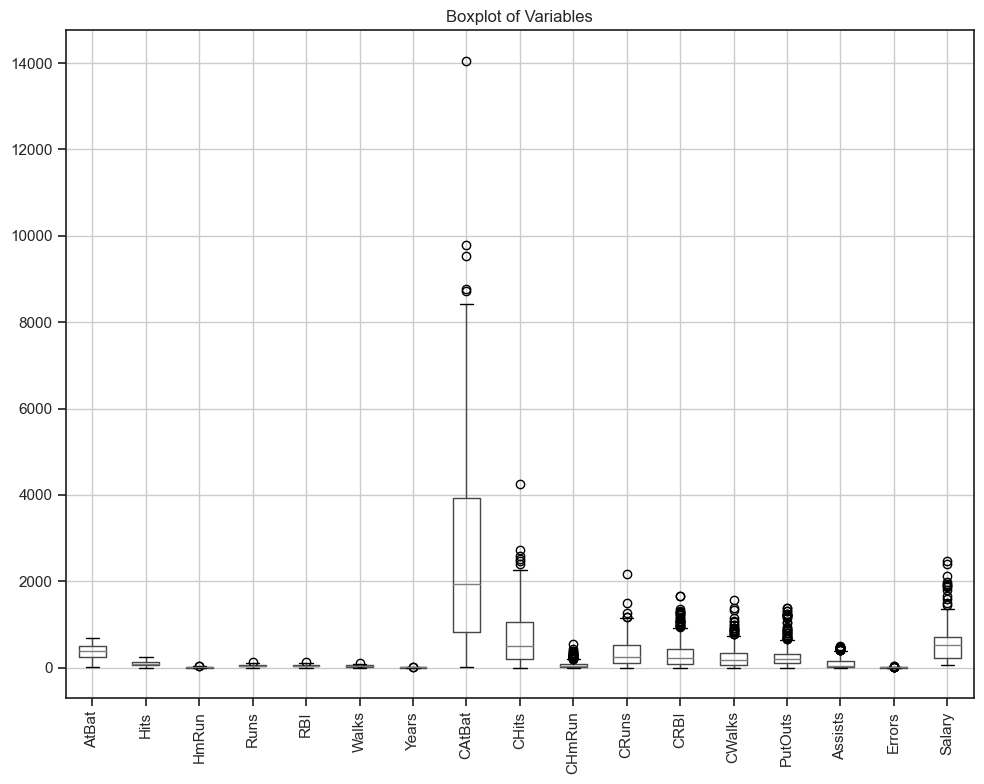

In [13]:
# Outlier Detection
# Boxplot
plt.figure(figsize=(10, 8))
df.boxplot()
plt.title('Boxplot of Variables')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [14]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,380.928571,101.024845,10.770186,50.909938,48.027950,38.742236,7.444099,2648.68323,717.571429,69.490683,358.795031,330.118012,260.239130,288.937888,106.913043,8.040373,535.925882
std,153.404981,46.454741,8.709037,26.024095,26.166895,21.639327,4.926087,2324.20587,654.472627,86.266061,334.105886,333.219617,267.058085,280.704614,136.854876,6.368359,407.557548
min,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.00000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000
25%,255.250000,64.000000,4.000000,30.250000,28.000000,22.000000,4.000000,816.75000,209.000000,14.000000,100.250000,88.750000,67.250000,109.250000,7.000000,3.000000,226.250000
50%,379.500000,96.000000,8.000000,48.000000,44.000000,35.000000,6.000000,1928.00000,508.000000,37.500000,247.000000,220.500000,170.500000,212.000000,39.500000,6.000000,535.925882
75%,512.000000,137.000000,16.000000,69.000000,64.750000,53.000000,11.000000,3924.25000,1059.250000,90.000000,526.250000,426.250000,339.250000,325.000000,166.000000,11.000000,700.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.00000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1378.000000,492.000000,32.000000,2460.000000


PCA

In [15]:
X=df.drop(['Salary'],axis=1) #target variable
X = X.drop(categorical_columns, axis=1)# 3 categorical variables - > League, Division, NewLeague
# y=df['Salary']

X = (X - X.mean(axis=0)) / X.std(axis=0)

In [16]:
X.shape

(322, 16)

In [17]:
mean = X.mean()
deviation = X - mean
covariance_matrix = deviation.T.dot(deviation) / (len(X) - 1)

covariance_matrix

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
AtBat,1.000000,0.967939,0.592198,0.913060,0.820539,0.669845,0.047372,0.235526,0.252717,0.236659,0.266534,0.244053,0.166123,0.317550,0.353824,0.352117
Hits,0.967939,1.000000,0.562158,0.922187,0.811073,0.641211,0.044767,0.227565,0.255815,0.202712,0.261787,0.232005,0.151818,0.310673,0.320455,0.310038
HmRun,0.592198,0.562158,1.000000,0.650988,0.855122,0.481014,0.116318,0.221882,0.220627,0.493227,0.262361,0.351979,0.233154,0.282923,-0.106329,0.039318
Runs,0.913060,0.922187,0.650988,1.000000,0.798206,0.732213,0.004541,0.186497,0.204830,0.227913,0.250556,0.205976,0.182168,0.279347,0.220567,0.240475
RBI,0.820539,0.811073,0.855122,0.798206,1.000000,0.615997,0.146168,0.294688,0.308201,0.441771,0.323285,0.393184,0.250914,0.343186,0.106591,0.193370
Walks,0.669845,0.641211,0.481014,0.732213,0.615997,1.000000,0.136475,0.277175,0.280671,0.332473,0.338478,0.308631,0.424507,0.299515,0.149656,0.129382
Years,0.047372,0.044767,0.116318,0.004541,0.146168,0.136475,1.000000,0.920289,0.903631,0.726872,0.882877,0.868812,0.838533,-0.004684,-0.080638,-0.162140
CAtBat,0.235526,0.227565,0.221882,0.186497,0.294688,0.277175,0.920289,1.000000,0.995063,0.798836,0.983345,0.949219,0.906501,0.062283,0.002038,-0.066922
CHits,0.252717,0.255815,0.220627,0.204830,0.308201,0.280671,0.903631,0.995063,1.000000,0.783306,0.984609,0.945141,0.890954,0.076547,-0.002523,-0.062756
CHmRun,0.236659,0.202712,0.493227,0.227913,0.441771,0.332473,0.726872,0.798836,0.783306,1.000000,0.820243,0.929484,0.799983,0.112724,-0.158511,-0.138115


In [18]:
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [19]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

explained_variance = eigenvalues / eigenvalues.sum()

print("Eigenvalues: ", explained_variance)
print("Eigenvectors: \n", eigenvectors)
print("Eigenvectors shape: ", eigenvectors.shape)

Eigenvalues:  [4.60378552e-01 2.60398491e-01 1.03388605e-01 5.36902121e-02
 4.20784091e-02 2.96359092e-02 1.57079101e-02 1.13928108e-02
 7.83230398e-03 5.87669497e-03 3.74765194e-03 3.09384056e-03
 1.55679403e-03 8.59034766e-04 2.86873704e-04 7.59064046e-05]
Eigenvectors: 
 [[-2.14752906e-01  3.71082920e-01  4.93101573e-02 -8.92304839e-02
  -1.07320141e-01  2.68283694e-01  1.42764041e-02  1.75742852e-01
  -1.22994237e-01 -6.94078338e-02 -1.66469556e-01  5.94906796e-01
   5.02612124e-01  1.30771344e-01  1.30727605e-01  5.31124186e-02]
 [-2.09643107e-01  3.66656663e-01  3.09091656e-02 -1.04599716e-01
  -1.55595637e-01  3.77079284e-01  4.64239754e-02  1.47030763e-01
  -7.53358311e-02  6.03407961e-03 -2.12652473e-01  3.30187263e-02
  -7.24765283e-01 -1.62056069e-01 -6.98564701e-02 -1.05328738e-01]
 [-2.08071035e-01  2.31888761e-01 -3.40175769e-01 -8.60753547e-02
   5.27613436e-01 -2.00659126e-01 -1.29387311e-01 -3.79154863e-01
   3.22431528e-01 -1.15573770e-01  1.46561772e-01  3.40412065e-

In [20]:
cumulative_variance_explained = np.cumsum(explained_variance)

cumulative_variance_explained_percentage = cumulative_variance_explained * 100
cumulative_variance_explained_percentage

array([ 46.03785523,  72.07770434,  82.41656483,  87.78558604,
        91.99342695,  94.95701787,  96.52780888,  97.66708996,
        98.45032036,  99.03798986,  99.41275505,  99.72213911,
        99.87781851,  99.96372199,  99.99240936, 100.        ])

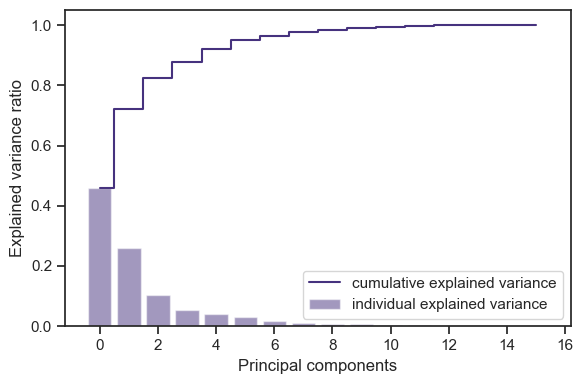

In [21]:
plt.figure(figsize=(6, 4))

plt.step(range(16), cumulative_variance_explained, where='mid',
             label='cumulative explained variance')
plt.bar(range(16), explained_variance, alpha=0.5, align='center',
        
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

Look at the elbow plot to determine the number of principal components to use.

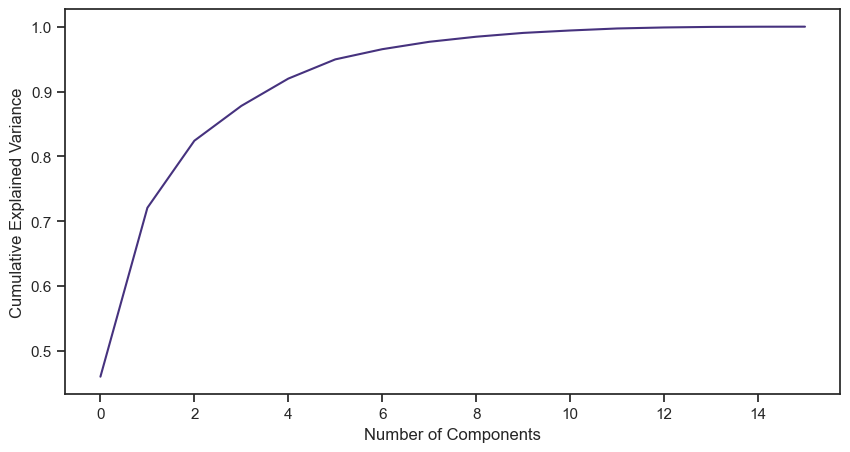

In [22]:
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [23]:
# Projecting the data onto the new eigenvector basis
projected_X = X.dot(eigenvectors)

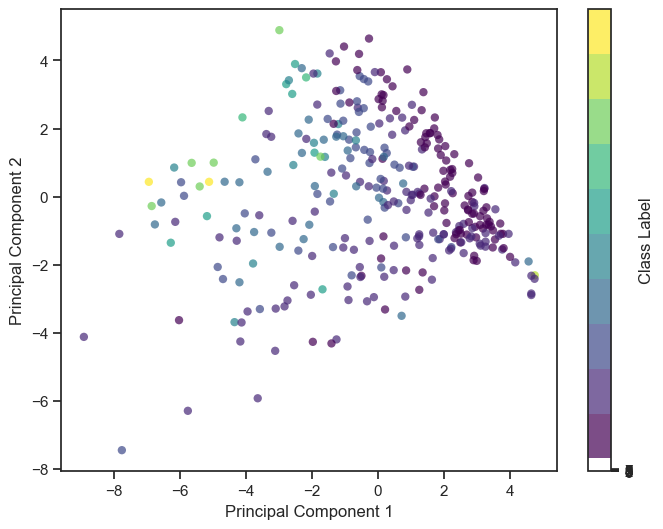

In [24]:

cmap = plt.cm.get_cmap('viridis', 10)
norm = plt.Normalize(0, 9)
colors = cmap(norm(y))

plt.figure(figsize=(8, 6))
sc = plt.scatter(projected_X.iloc[:, 0], projected_X.iloc[:, 1], c=y, edgecolor='none', alpha=0.7, cmap=cmap)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

cbar = plt.colorbar(sc)
cbar.set_label('Class Label')
cbar.set_ticks(range(10)) 
cbar.set_ticklabels([str(i) for i in range(10)]) 

plt.show()

In [25]:
X = X.values
y = y.values

indices = np.random.permutation(X.shape[0])
train_idx, test_idx = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]

U, S, Vt = np.linalg.svd(X_train - np.mean(X_train, axis=0), full_matrices=False)

components = list(range(1, X_train.shape[1]+1))

mse_list = []

for n in components:
    X_train_pca = np.dot(U[:,:n], np.diag(S[:n]))
    X_test_pca = np.dot((X_test - np.mean(X_train, axis=0)), Vt.T[:,:n])

    X_train_pca_c = sm.add_constant(X_train_pca)
    X_test_pca_c = sm.add_constant(X_test_pca)

    model = sm.OLS(y_train, X_train_pca_c)
    results = model.fit()

    y_pred = results.predict(X_test_pca_c)

    mse = np.mean((y_test - y_pred)**2)
    mse_list.append(mse)

    print(f'Number of components: {n}, Mean Squared Error: {mse}')

Number of components: 1, Mean Squared Error: 126522.32931534418
Number of components: 2, Mean Squared Error: 125953.9622313186
Number of components: 3, Mean Squared Error: 124689.51338093201
Number of components: 4, Mean Squared Error: 121104.71034098488
Number of components: 5, Mean Squared Error: 116946.20339750305
Number of components: 6, Mean Squared Error: 117411.31574001852
Number of components: 7, Mean Squared Error: 117234.79658105991
Number of components: 8, Mean Squared Error: 123656.78933846092
Number of components: 9, Mean Squared Error: 123786.85048416484
Number of components: 10, Mean Squared Error: 123703.24580459
Number of components: 11, Mean Squared Error: 134532.6581193975
Number of components: 12, Mean Squared Error: 130737.63463464964
Number of components: 13, Mean Squared Error: 131401.52160775455
Number of components: 14, Mean Squared Error: 126111.12402610519
Number of components: 15, Mean Squared Error: 128660.17917523271
Number of components: 16, Mean Squared 

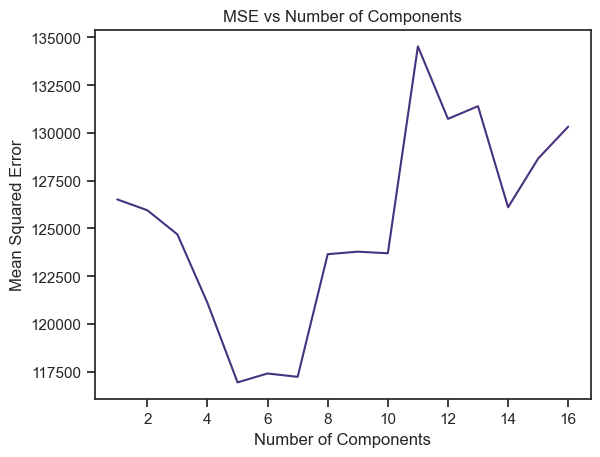

In [26]:
plt.plot(components, mse_list)
plt.xlabel('Number of Components')
plt.ylabel('Mean Squared Error')
plt.title('MSE vs Number of Components')
plt.show()

In [ ]:
class PolynomialFeatures:
    def __init__(self, degree):
        self.degree = degree

    def fit_transform(self, X):
        n_samples, n_features = X.shape
        result = np.ones((n_samples, 1))
        for d in range(1, self.degree + 1):
            for i in range(n_features):
                result = np.concatenate((result, (X[:, i]**d)[:, np.newaxis]), axis=1)
        return result


class Lasso:
    def __init__(self, alpha=1.0, max_iter=1000, tol=1e-4, learning_rate=0.01):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol
        self.learning_rate = learning_rate
        self.w = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        for _ in range(self.max_iter):
            w_prev = np.copy(self.w)
            for i in range(n_features):
                self.w[i] += self.learning_rate * (1 / n_samples) * (X[:, i] @ (y - X @ self.w) + self.alpha * np.sign(self.w[i]))
            if np.linalg.norm(self.w - w_prev) < self.tol:
                break

    def predict(self, X):
        return X @ self.w


class Ridge:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.w = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.linalg.inv(X.T @ X + self.alpha * np.identity(n_features)) @ X.T @ y

    def predict(self, X):
        return X @ self.w


Creating Model using 5 Principal Components

In [27]:
indx = np.random.permutation(X.shape[0])
train_idx, test_idx = indx[:int(0.8*X.shape[0])], indx[int(0.8*X.shape[0]):]
X_train, X_test = X[train_idx,:], X[test_idx,:]
y_train, y_test = y[train_idx], y[test_idx]

U, S, Vet = np.linalg.svd(X_train - np.mean(X_train, axis=0), full_matrices=False)

n = 5
X_train_pca = np.dot(U[:,:n], np.diag(S[:n]))
X_test_pca = np.dot((X_test - np.mean(X_train, axis=0)), Vet.T[:,:n])

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)

lasso_model = Lasso()
lasso_model.fit(X_train_poly, y_train)

ridge_model = Ridge()
ridge_model.fit(X_train_poly, y_train)

i = 2
point = X_test_poly[i].reshape(1, -1)

y_pred_lasso = lasso_model.predict(point)
print(f'The predicted y value for the selected point using Lasso is {y_pred_lasso[0]}')

y_pred_ridge = ridge_model.predict(point)
print(f'The predicted y value for the selected point using Ridge is {y_pred_ridge[0]}')
print(f'The actual y value for the selected point is {y_test[i]}')

The predicted y value for the selected point using Lasso is 352.5755733147337
The predicted y value for the selected point using Ridge is 351.3540295417232
The actual y value for the selected point is 350.0
